# Distribución t-student

Resuelve el siguiente problema en Python

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.

Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

Pasos que debes de seguir para resolver el problema:

1.- Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos

2.- Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.

3.- Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

4.- En caso de que no sean normales considera que tienen una distribución t-student.

5.- Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.

In [31]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
df = pd.DataFrame()

In [32]:
df['jugo_A'] = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23]
df['jugo_B'] = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]
df

,jugo_A,jugo_B
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23
5,26,22
6,24,20
7,21,19
8,27,22
9,25,21


Estandarizamos los valores

In [33]:
media = df.mean()
media

jugo_A    23.933333
jugo_B    20.433333
dtype: float64

In [34]:
std = df.std()
std

jugo_A    1.981524
jugo_B    1.633345
dtype: float64

In [35]:
norm_df = (df - media)/std

In [36]:
norm_df

,jugo_A,jugo_B
0,-1.985004,-0.877545
1,0.538306,-1.489785
2,-0.975680,0.346936
3,-0.471018,-0.265304
4,2.052293,1.571417
5,1.042968,0.959177
6,0.033644,-0.265304
7,-1.480342,-0.877545
8,1.547630,0.959177
9,0.538306,0.346936


QQ-Plot del Jugo A:

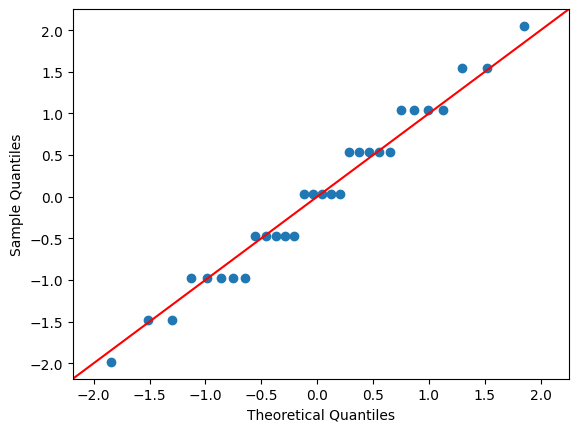

In [37]:
figura_A = sm.qqplot(norm_df['jugo_A'], scale = 1, line = '45')

QQ-Plot del Jugo B:

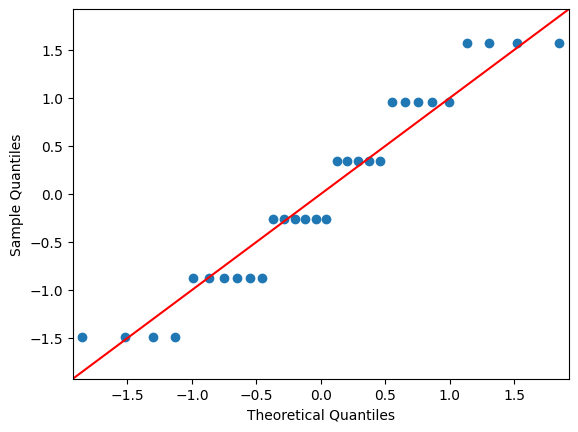

In [38]:
figura_B = sm.qqplot(norm_df['jugo_B'], scale = 1, line = '45')

Test de Kolmogorov Smirnov:

Jugo A:

In [39]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(norm_df['jugo_A'], 'norm')

KstestResult(statistic=0.11451938044354537, pvalue=0.7847561982514, statistic_location=-0.4710179651534195, statistic_sign=1)

Jugo B:

In [40]:
stats.kstest(norm_df['jugo_B'], 'norm')

KstestResult(statistic=0.14323791303933453, pvalue=0.5231390691550495, statistic_location=-0.8775447188558786, statistic_sign=1)

Como podemos obervar, el $p-valor$ es mayor a $0.05$ en ambos Jugos, por lo que el test de Kolmogorov Smirnov nos indica que la distribución es normal.


Al 99% de confianza:

$P(z > a) = 0.005$

$1-P(z \le a) = 0.005$

$P(z < a) = 1 - 0.005$

$P(z < a) = 0.995$

Utilizamos la tabla de valores de una distribución normal, y nos da:

$V_{c} = a = 2.57$

Calculamos el valor esperado y los limites: $\mu = \overline{x} ± V_{c}(\frac{\sigma}{\sqrt{ n}})  $

Jugo A:

In [41]:
from math import sqrt
vc = 2.57
n = norm_df['jugo_A'].count()

lim_inf  = media[0] - vc*(std[0]/sqrt(n))
lim_sup  = media[0] + vc*(std[0]/sqrt(n))

ancho = lim_sup - lim_inf

print('El intervalor de confianza del jugo A al 99% de confianza es: [' + str(lim_inf) + ', ' + str(lim_sup) + ']')
print('El ancho es: ' + str(ancho))

El intervalor de confianza del jugo A al 99% de confianza es: [23.003571315416014, 24.863095351250653]
El ancho es: 1.8595240358346388


Jugo B:

In [42]:
n = norm_df['jugo_B'].count()

lim_inf  = media[1] - vc*(std[1]/sqrt(n))
lim_sup  = media[1] + vc*(std[1]/sqrt(n))

ancho = lim_sup - lim_inf

print('El intervalor de confianza del jugo B al 99% de confianza es: [' + str(lim_inf) + ', ' + str(lim_sup) + ']')
print('El ancho es: ' + str(ancho))

El intervalor de confianza del jugo B al 99% de confianza es: [19.666942255929047, 21.19972441073762]
El ancho es: 1.5327821548085723


# Conclusión

A juzgar por el ancho y la confianza al 99%, podemos determinar que las muestras del jugo B son más confiables, ya que el ancho de su intervalo de confianza es menor que el del jugo A, lo cual lo hace más exacto.